In [1]:
import pandas as pd
import statsmodels.api as sm    

data_1910 = pd.read_parquet("../data/modelling/works_modelling_1910s.parquet")
data_1920 = pd.read_parquet("../data/modelling/works_modelling_1920s.parquet")
data_1930 = pd.read_parquet("../data/modelling/works_modelling_1930s.parquet")
data_1940 = pd.read_parquet("../data/modelling/works_modelling_1940s.parquet")
data_1950 = pd.read_parquet("../data/modelling/works_modelling_1950s.parquet")
data_1960 = pd.read_parquet("../data/modelling/works_modelling_1960s.parquet")
data_1970 = pd.read_parquet("../data/modelling/works_modelling_1970s.parquet")
data_1980 = pd.read_parquet("../data/modelling/works_modelling_1980s.parquet")
data_1990 = pd.read_parquet("../data/modelling/works_modelling_1990s.parquet")
data_2000 = pd.read_parquet("../data/modelling/works_modelling_2000s.parquet")
data_2010 = pd.read_parquet("../data/modelling/works_modelling_2010s.parquet")
data_2020 = pd.read_parquet("../data/modelling/works_modelling_2020s.parquet")

all_top10 = {}
primary_topic_top10 = {}
topic_top10 = {}
other_top10 = {}
lcc_percentiles = {}


# 1910s

In [2]:
df = data_1910.copy()
print(df["year"].min(), df["year"].max())
numeric_cols = [
        "countries_distinct_count", "institutions_distinct_count",
        "referenced_works_count", "authors_count",
        "mean_past_contributions_authors", "mean_past_mncs_authors",
        "mean_past_contributions_institutions", "mean_past_mncs_institutions",
        "past_contributions_topic", "mean_past_mncs_topic"]

categorical_cols = []
if "topic_name" in df.columns:
    df["topic"] = df["topic_name"].astype(str)
    categorical_cols.append("topic")
if "primary_topic" in df.columns:
    categorical_cols.append("primary_topic")


df_onehot = pd.get_dummies(df[categorical_cols], prefix=categorical_cols, drop_first=False)


X_numeric = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

X = pd.concat([X_numeric, df_onehot], axis=1)

y = pd.to_numeric(df["mncs"], errors='coerce')

mask = X.notna().all(axis=1) & y.notna()
X = X.loc[mask].astype(float)  
y = y.loc[mask].astype(float)

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(model_sm.summary())




1910 1919
                                                         coef          pval
topic_choline_acetyl                                17.616202  2.360274e-24
primary_topic_Beetle Biology and Toxicology Stu...  11.444231  8.339190e-09
primary_topic_Marine Toxins and Detection Methods   10.149947  2.908481e-05
topic_cyanide_methylene                              8.782828  1.796812e-03
primary_topic_Trauma Hemostasis, Coagulopathy, ...   8.203678  5.616098e-04
...                                                       ...           ...
primary_topic_Environmental Toxicology and Ecot...  -5.090112  2.300154e-01
primary_topic_Plant Physiology and Cultivation ...  -5.756256  1.761845e-01
primary_topic_Microbial Metabolites in Food Bio...  -5.886407  2.724374e-01
primary_topic_Eicosanoids and Hypertension Phar...  -8.917840  8.212913e-07
primary_topic_Antimicrobial agents and applicat... -10.004673  5.889164e-03

[298 rows x 2 columns]
                            OLS Regression Results    

In [3]:
primary_cols = [c for c in X.columns if "primary_topic" in c]
if primary_cols:
    X_primary = sm.add_constant(X[primary_cols])
    model_primary = sm.OLS(y, X_primary).fit()
    print("\n========== PRIMARY_TOPIC MODEL SUMMARY ==========")
    print(model_primary.summary())


========== PRIMARY_TOPIC MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     1.244
Date:                Mon, 03 Nov 2025   Prob (F-statistic):             0.0288
Time:                        11:30:51   Log-Likelihood:                -1414.2
No. Observations:                 658   AIC:                             3270.
Df Residuals:                     437   BIC:                             4262.
Df Model:                         220                                         
Covariance Type:            nonrobust                                         
                                                                                                   coef    std err          t      P>|t|      [0.025      0.975

In [4]:
topic_cols = [c for c in X.columns if c.startswith("topic")]
if topic_cols:
    X_topic = sm.add_constant(X[topic_cols])
    model_topic = sm.OLS(y, X_topic).fit()
    print("\n========== TOPIC MODEL SUMMARY ==========")
    print(model_topic.summary())


========== TOPIC MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     2.648
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           5.04e-10
Time:                        11:30:51   Log-Likelihood:                -1487.6
No. Observations:                 658   AIC:                             3111.
Df Residuals:                     590   BIC:                             3417.
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [5]:
other_cols = [c for c in X.columns if not ("topic" in c or "primary_topic" in c)]
if other_cols:
    X_other = sm.add_constant(X[other_cols])
    model_other = sm.OLS(y, X_other).fit()
    print("\n========== OTHER VARIABLES MODEL SUMMARY ==========")
    print(model_other.summary())


========== OTHER VARIABLES MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     14.32
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           4.80e-09
Time:                        11:30:51   Log-Likelihood:                -1553.2
No. Observations:                 658   AIC:                             3114.
Df Residuals:                     654   BIC:                             3132.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

C:\Users\noahr\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [6]:
results_df = results_df[results_df["pval"] <= 0.05].sort_values("coef", ascending=False)

primary_topic_mask = results_df.index.str.startswith("primary_topic")
primary_topic_top10["1910"] = results_df[primary_topic_mask].head(10).to_dict(orient="index")

topic_mask = results_df.index.str.startswith("topic")
topic_top10["1910"] = results_df[topic_mask].head(10).to_dict(orient="index")

other_mask = ~results_df.index.str.contains("topic") & ~results_df.index.str.contains("primary_topic")
other_top10["1910"] = results_df[other_mask].head(10).to_dict(orient="index")

top10 = results_df.head(10).to_dict(orient="index")
all_top10["1910"] = top10

lcc_percentiles["1910"] = model_sm.rsquared * 100

# 1920s

In [7]:
df = data_1920.copy()

numeric_cols = [
        "countries_distinct_count", "institutions_distinct_count",
        "referenced_works_count", "authors_count",
        "mean_past_contributions_authors", "mean_past_mncs_authors",
        "mean_past_contributions_institutions", "mean_past_mncs_institutions",
        "past_contributions_topic", "mean_past_mncs_topic"]

categorical_cols = []
if "topic_name" in df.columns:
    df["topic"] = df["topic_name"].astype(str)
    categorical_cols.append("topic")
if "primary_topic" in df.columns:
    categorical_cols.append("primary_topic")

df_onehot = pd.get_dummies(df[categorical_cols], drop_first=False)

X_numeric = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

X = pd.concat([X_numeric, df_onehot], axis=1)

y = pd.to_numeric(df["mncs"], errors='coerce')

mask = X.notna().all(axis=1) & y.notna()
X = X.loc[mask].astype(float)  
y = y.loc[mask].astype(float)

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(model_sm.summary())



                                                         coef          pval
primary_topic_Infant Health and Development         14.866434  8.366357e-14
primary_topic_Neurological Complications and Sy...  14.406727  2.447401e-11
primary_topic_Neuroscience Education and Cognit...  14.332152  5.503774e-13
primary_topic_Neurotransmitter Receptor Influen...   6.919910  2.513406e-13
topic_absorption_gastro                              5.513988  1.758602e-04
...                                                       ...           ...
primary_topic_Surface Roughness and Optical Mea...  -2.950390  1.736711e-01
topic_centre_vasomotor                              -3.010054  3.159343e-01
topic_tetrapods_pupil                               -3.204502  7.851468e-03
primary_topic_Child Nutrition and Feeding Issues    -3.354753  1.025356e-01
topic_metrazol_convulsant                           -3.807859  1.036399e-02

[399 rows x 2 columns]
                            OLS Regression Results              

In [8]:
primary_cols = [c for c in X.columns if "primary_topic" in c]
if primary_cols:
    X_primary = sm.add_constant(X[primary_cols])
    model_primary = sm.OLS(y, X_primary).fit()
    print("\n========== PRIMARY_TOPIC MODEL SUMMARY ==========")
    print(model_primary.summary())


========== PRIMARY_TOPIC MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     1.614
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           1.32e-07
Time:                        11:30:52   Log-Likelihood:                -2111.7
No. Observations:                1061   AIC:                             4833.
Df Residuals:                     756   BIC:                             6348.
Df Model:                         304                                         
Covariance Type:            nonrobust                                         
                                                                                                   coef    std err          t      P>|t|      [0.025      0.975

In [9]:
topic_cols = [c for c in X.columns if c.startswith("topic")]
if topic_cols:
    X_topic = sm.add_constant(X[topic_cols])
    model_topic = sm.OLS(y, X_topic).fit()
    print("\n========== TOPIC MODEL SUMMARY ==========")
    print(model_topic.summary())


========== TOPIC MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     2.824
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           2.87e-14
Time:                        11:30:52   Log-Likelihood:                -2261.6
No. Observations:                1061   AIC:                             4693.
Df Residuals:                     976   BIC:                             5115.
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [10]:
other_cols = [c for c in X.columns if not ("topic" in c or "primary_topic" in c)]
if other_cols:
    X_other = sm.add_constant(X[other_cols])
    model_other = sm.OLS(y, X_other).fit()
    print("\n========== OTHER VARIABLES MODEL SUMMARY ==========")
    print(model_other.summary())


========== OTHER VARIABLES MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     40.13
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           2.50e-31
Time:                        11:30:52   Log-Likelihood:                -2301.9
No. Observations:                1061   AIC:                             4614.
Df Residuals:                    1056   BIC:                             4639.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

C:\Users\noahr\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [11]:
results_df = results_df[results_df["pval"] <= 0.05].sort_values("coef", ascending=False)

primary_topic_mask = results_df.index.str.startswith("primary_topic")
primary_topic_top10["1920"] = results_df[primary_topic_mask].head(10).to_dict(orient="index")

topic_mask = results_df.index.str.startswith("topic")
topic_top10["1920"] = results_df[topic_mask].head(10).to_dict(orient="index")

other_mask = ~results_df.index.str.contains("topic") & ~results_df.index.str.contains("primary_topic")
other_top10["1920"] = results_df[other_mask].head(10).to_dict(orient="index")

top10 = results_df.head(10).to_dict(orient="index")
all_top10["1920"] = top10

lcc_percentiles["1920"] = model_sm.rsquared * 100


# 1930s

In [12]:
df = data_1930.copy()

numeric_cols = [
        "countries_distinct_count", "institutions_distinct_count",
        "referenced_works_count", "authors_count",
        "mean_past_contributions_authors", "mean_past_mncs_authors",
        "mean_past_contributions_institutions", "mean_past_mncs_institutions",
        "past_contributions_topic", "mean_past_mncs_topic"]

categorical_cols = []
if "topic_name" in df.columns:
    df["topic"] = df["topic_name"].astype(str)
    categorical_cols.append("topic")
if "primary_topic" in df.columns:
    categorical_cols.append("primary_topic")

df_onehot = pd.get_dummies(df[categorical_cols], drop_first=False)

X_numeric = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

X = pd.concat([X_numeric, df_onehot], axis=1)

y = pd.to_numeric(df["mncs"], errors='coerce')

mask = X.notna().all(axis=1) & y.notna()
X = X.loc[mask].astype(float)  
y = y.loc[mask].astype(float)

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(model_sm.summary())




                                                         coef          pval
primary_topic_Cardiomyopathy and Myosin Studies     19.339149  7.498914e-21
primary_topic_Radioactivity and Radon Measurements   6.524022  4.951645e-03
primary_topic_Monoclonal and Polyclonal Antibod...   5.711929  1.621491e-02
primary_topic_Migraine and Headache Studies          5.362564  6.202905e-05
primary_topic_Peroxisome Proliferator-Activated...   5.261266  1.604999e-03
...                                                       ...           ...
primary_topic_Pesticide Residue Analysis and Sa...  -2.541679  2.432949e-01
topic_anaphylactoid_anaphylactic                    -2.580296  2.411705e-01
topic_cinchophen_carthamoidine                      -2.610705  4.412419e-02
topic_adrenergic_blocking                           -2.688493  2.350454e-01
primary_topic_Music Technology and Sound Studies    -2.749960  2.488646e-01

[456 rows x 2 columns]
                            OLS Regression Results              

In [13]:
primary_cols = [c for c in X.columns if "primary_topic" in c]
if primary_cols:
    X_primary = sm.add_constant(X[primary_cols])
    model_primary = sm.OLS(y, X_primary).fit()
    print("\n========== PRIMARY_TOPIC MODEL SUMMARY ==========")
    print(model_primary.summary())


========== PRIMARY_TOPIC MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     1.422
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           1.14e-05
Time:                        11:30:53   Log-Likelihood:                -3123.8
No. Observations:                1555   AIC:                             6948.
Df Residuals:                    1205   BIC:                             8820.
Df Model:                         349                                         
Covariance Type:            nonrobust                                         
                                                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------

In [14]:
topic_cols = [c for c in X.columns if c.startswith("topic")]
if topic_cols:
    X_topic = sm.add_constant(X[topic_cols])
    model_topic = sm.OLS(y, X_topic).fit()
    print("\n========== TOPIC MODEL SUMMARY ==========")
    print(model_topic.summary())


========== TOPIC MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     2.460
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           1.81e-12
Time:                        11:30:53   Log-Likelihood:                -3275.1
No. Observations:                1555   AIC:                             6744.
Df Residuals:                    1458   BIC:                             7263.
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [15]:
other_cols = [c for c in X.columns if not ("topic" in c or "primary_topic" in c)]
if other_cols:
    X_other = sm.add_constant(X[other_cols])
    model_other = sm.OLS(y, X_other).fit()
    print("\n========== OTHER VARIABLES MODEL SUMMARY ==========")
    print(model_other.summary())


========== OTHER VARIABLES MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     20.59
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           5.97e-20
Time:                        11:30:53   Log-Likelihood:                -3341.9
No. Observations:                1555   AIC:                             6696.
Df Residuals:                    1549   BIC:                             6728.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

C:\Users\noahr\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [16]:
results_df = results_df[results_df["pval"] <= 0.05].sort_values("coef", ascending=False)

primary_topic_mask = results_df.index.str.startswith("primary_topic")
primary_topic_top10["1930"] = results_df[primary_topic_mask].head(10).to_dict(orient="index")

topic_mask = results_df.index.str.startswith("topic")
topic_top10["1930"] = results_df[topic_mask].head(10).to_dict(orient="index")

other_mask = ~results_df.index.str.contains("topic") & ~results_df.index.str.contains("primary_topic")
other_top10["1930"] = results_df[other_mask].head(10).to_dict(orient="index")

top10 = results_df.head(10).to_dict(orient="index")
all_top10["1930"] = top10

lcc_percentiles["1930"] = model_sm.rsquared * 100


# 1940s

In [17]:
df = data_1940.copy()

numeric_cols = [
        "countries_distinct_count", "institutions_distinct_count",
        "referenced_works_count", "authors_count",
        "mean_past_contributions_authors", "mean_past_mncs_authors",
        "mean_past_contributions_institutions", "mean_past_mncs_institutions",
        "past_contributions_topic", "mean_past_mncs_topic"]

categorical_cols = []
if "topic_name" in df.columns:
    df["topic"] = df["topic_name"].astype(str)
    categorical_cols.append("topic")
if "primary_topic" in df.columns:
    categorical_cols.append("primary_topic")

df_onehot = pd.get_dummies(df[categorical_cols], drop_first=False)

X_numeric = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

X = pd.concat([X_numeric, df_onehot], axis=1)

y = pd.to_numeric(df["mncs"], errors='coerce')

mask = X.notna().all(axis=1) & y.notna()
X = X.loc[mask].astype(float)  
y = y.loc[mask].astype(float)

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(model_sm.summary())





                                                         coef          pval
topic_narcosis_narcotic                             69.485541  2.213276e-84
primary_topic_Graphite nuclear technology, radi...  59.656925  9.608188e-76
topic_mustard_gas                                   32.056550  2.908112e-38
topic_selenium_tellurium                            30.863659  1.514009e-20
topic_nitrites_nitrates                             19.990093  7.166989e-17
...                                                       ...           ...
mean_past_mncs_topic                               -10.261362  2.449207e-64
primary_topic_Advancements in Transdermal Drug ... -16.916881  4.906168e-05
topic_calcium_magnesium                            -21.310525  6.056601e-15
primary_topic_Biopolymer Synthesis and Applicat... -27.699055  2.675658e-07
primary_topic_Antimicrobial agents and applicat... -28.384143  1.297081e-07

[535 rows x 2 columns]
                            OLS Regression Results              

In [18]:
primary_cols = [c for c in X.columns if "primary_topic" in c]
if primary_cols:
    X_primary = sm.add_constant(X[primary_cols])
    model_primary = sm.OLS(y, X_primary).fit()
    print("\n========== PRIMARY_TOPIC MODEL SUMMARY ==========")
    print(model_primary.summary())


========== PRIMARY_TOPIC MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.9229
Date:                Mon, 03 Nov 2025   Prob (F-statistic):              0.843
Time:                        11:30:54   Log-Likelihood:                -5589.5
No. Observations:                1869   AIC:                         1.204e+04
Df Residuals:                    1441   BIC:                         1.440e+04
Df Model:                         427                                         
Covariance Type:            nonrobust                                         
                                                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------

In [19]:
topic_cols = [c for c in X.columns if c.startswith("topic")]
if topic_cols:
    X_topic = sm.add_constant(X[topic_cols])
    model_topic = sm.OLS(y, X_topic).fit()
    print("\n========== TOPIC MODEL SUMMARY ==========")
    print(model_topic.summary())


========== TOPIC MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1.483
Date:                Mon, 03 Nov 2025   Prob (F-statistic):            0.00200
Time:                        11:30:54   Log-Likelihood:                -5742.5
No. Observations:                1869   AIC:                         1.168e+04
Df Residuals:                    1771   BIC:                         1.222e+04
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [20]:
other_cols = [c for c in X.columns if not ("topic" in c or "primary_topic" in c)]
if other_cols:
    X_other = sm.add_constant(X[other_cols])
    model_other = sm.OLS(y, X_other).fit()
    print("\n========== OTHER VARIABLES MODEL SUMMARY ==========")
    print(model_other.summary())


========== OTHER VARIABLES MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.022
Date:                Mon, 03 Nov 2025   Prob (F-statistic):             0.0727
Time:                        11:30:54   Log-Likelihood:                -5810.4
No. Observations:                1869   AIC:                         1.163e+04
Df Residuals:                    1863   BIC:                         1.167e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

C:\Users\noahr\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [21]:
results_df = results_df[results_df["pval"] <= 0.05].sort_values("coef", ascending=False)

primary_topic_mask = results_df.index.str.startswith("primary_topic")
primary_topic_top10["1940"] = results_df[primary_topic_mask].head(10).to_dict(orient="index")

topic_mask = results_df.index.str.startswith("topic")
topic_top10["1940"] = results_df[topic_mask].head(10).to_dict(orient="index")

other_mask = ~results_df.index.str.contains("topic") & ~results_df.index.str.contains("primary_topic")
other_top10["1940"] = results_df[other_mask].head(10).to_dict(orient="index")

top10 = results_df.head(10).to_dict(orient="index")
all_top10["1940"] = top10

lcc_percentiles["1940"] = model_sm.rsquared * 100


# 1950s

In [22]:
df = data_1950.copy()

numeric_cols = [
        "countries_distinct_count", "institutions_distinct_count",
        "referenced_works_count", "authors_count",
        "mean_past_contributions_authors", "mean_past_mncs_authors",
        "mean_past_contributions_institutions", "mean_past_mncs_institutions",
        "past_contributions_topic", "mean_past_mncs_topic"]

categorical_cols = []
if "topic_name" in df.columns:
    df["topic"] = df["topic_name"].astype(str)
    categorical_cols.append("topic")
if "primary_topic" in df.columns:
    categorical_cols.append("primary_topic")

df_onehot = pd.get_dummies(df[categorical_cols], drop_first=False)

X_numeric = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

X = pd.concat([X_numeric, df_onehot], axis=1)

y = pd.to_numeric(df["mncs"], errors='coerce')

mask = X.notna().all(axis=1) & y.notna()
X = X.loc[mask].astype(float)  
y = y.loc[mask].astype(float)

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(model_sm.summary())




                                                         coef          pval
topic_narcosis_narcotic                             25.820576  6.297430e-08
primary_topic_Inhalation and Respiratory Drug D...  21.895084  1.123790e-29
primary_topic_Nausea and vomiting management        20.580846  1.446392e-11
topic_mustard_gas                                   14.768585  9.678803e-07
topic_intoxications_albino                          13.523663  3.065257e-12
...                                                       ...           ...
topic__                                             -4.988949  2.210635e-07
primary_topic_Mycotoxins in Agriculture and Food    -5.060730  1.457222e-01
topic_hemorrhage_shock                              -5.097665  2.368318e-01
topic_index_announcements                           -5.187672  6.151570e-05
mean_past_mncs_topic                                -5.590024  4.943237e-08

[564 rows x 2 columns]
                            OLS Regression Results              

In [23]:
primary_cols = [c for c in X.columns if "primary_topic" in c]
if primary_cols:
    X_primary = sm.add_constant(X[primary_cols])
    model_primary = sm.OLS(y, X_primary).fit()
    print("\n========== PRIMARY_TOPIC MODEL SUMMARY ==========")
    print(model_primary.summary())


========== PRIMARY_TOPIC MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.9603
Date:                Mon, 03 Nov 2025   Prob (F-statistic):              0.703
Time:                        11:30:55   Log-Likelihood:                -5790.3
No. Observations:                2385   AIC:                         1.250e+04
Df Residuals:                    1925   BIC:                         1.516e+04
Df Model:                         459                                         
Covariance Type:            nonrobust                                         
                                                                                                   coef    std err          t      P>|t|      [0.025      0.975

In [24]:
topic_cols = [c for c in X.columns if c.startswith("topic")]
if topic_cols:
    X_topic = sm.add_constant(X[topic_cols])
    model_topic = sm.OLS(y, X_topic).fit()
    print("\n========== TOPIC MODEL SUMMARY ==========")
    print(model_topic.summary())


========== TOPIC MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.391
Date:                Mon, 03 Nov 2025   Prob (F-statistic):            0.00896
Time:                        11:30:55   Log-Likelihood:                -5970.7
No. Observations:                2385   AIC:                         1.213e+04
Df Residuals:                    2291   BIC:                         1.267e+04
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [25]:
other_cols = [c for c in X.columns if not ("topic" in c or "primary_topic" in c)]
if other_cols:
    X_other = sm.add_constant(X[other_cols])
    model_other = sm.OLS(y, X_other).fit()
    print("\n========== OTHER VARIABLES MODEL SUMMARY ==========")
    print(model_other.summary())


========== OTHER VARIABLES MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     8.564
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           1.46e-11
Time:                        11:30:55   Log-Likelihood:                -6002.3
No. Observations:                2385   AIC:                         1.202e+04
Df Residuals:                    2376   BIC:                         1.207e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [26]:
results_df = results_df[results_df["pval"] <= 0.05].sort_values("coef", ascending=False)

primary_topic_mask = results_df.index.str.startswith("primary_topic")
primary_topic_top10["1950"] = results_df[primary_topic_mask].head(10).to_dict(orient="index")

topic_mask = results_df.index.str.startswith("topic")
topic_top10["1950"] = results_df[topic_mask].head(10).to_dict(orient="index")

other_mask = ~results_df.index.str.contains("topic") & ~results_df.index.str.contains("primary_topic")
other_top10["1950"] = results_df[other_mask].head(10).to_dict(orient="index")

top10 = results_df.head(10).to_dict(orient="index")
all_top10["1950"] = top10

lcc_percentiles["1950"] = model_sm.rsquared * 100


# 1960s

In [27]:
df = data_1960.copy()

numeric_cols = [
        "countries_distinct_count", "institutions_distinct_count",
        "referenced_works_count", "authors_count",
        "mean_past_contributions_authors", "mean_past_mncs_authors",
        "mean_past_contributions_institutions", "mean_past_mncs_institutions",
        "past_contributions_topic", "mean_past_mncs_topic"]

categorical_cols = []
if "topic_name" in df.columns:
    df["topic"] = df["topic_name"].astype(str)
    categorical_cols.append("topic")
if "primary_topic" in df.columns:
    categorical_cols.append("primary_topic")

df_onehot = pd.get_dummies(df[categorical_cols], drop_first=False)

X_numeric = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

X = pd.concat([X_numeric, df_onehot], axis=1)

y = pd.to_numeric(df["mncs"], errors='coerce')

mask = X.notna().all(axis=1) & y.notna()
X = X.loc[mask].astype(float)  
y = y.loc[mask].astype(float)

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(model_sm.summary())



                                                         coef      pval
primary_topic_Gene Regulatory Network Analysis      25.532149  0.000003
primary_topic_Sleep and related disorders           18.853187  0.000002
primary_topic_Biological Stains and Phytochemicals  13.231711  0.015984
primary_topic_Leprosy Research and Treatment         7.916170  0.044115
primary_topic_Zebrafish Biomedical Research App...   6.785530  0.083439
...                                                       ...       ...
primary_topic_Sexual function and dysfunction s...  -3.616352  0.267462
primary_topic_Bone and Dental Protein Studies       -3.678762  0.503204
primary_topic_Polyoxometalates: Synthesis and A...  -3.722258  0.497853
primary_topic_Parasites and Host Interactions       -4.460298  0.188805
primary_topic_Immunotoxicology and immune respo...  -4.934445  0.205156

[968 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:                   

In [28]:
primary_cols = [c for c in X.columns if "primary_topic" in c]
if primary_cols:
    X_primary = sm.add_constant(X[primary_cols])
    model_primary = sm.OLS(y, X_primary).fit()
    print("\n========== PRIMARY_TOPIC MODEL SUMMARY ==========")
    print(model_primary.summary())


========== PRIMARY_TOPIC MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.080
Method:                 Least Squares   F-statistic:                    0.1929
Date:                Mon, 03 Nov 2025   Prob (F-statistic):               1.00
Time:                        11:31:00   Log-Likelihood:                -31894.
No. Observations:                9333   AIC:                         6.550e+04
Df Residuals:                    8478   BIC:                         7.160e+04
Df Model:                         854                                         
Covariance Type:            nonrobust                                         
                                                                                                   coef    std err          t      P>|t|      [0.025      0.975

In [29]:
topic_cols = [c for c in X.columns if c.startswith("topic")]
if topic_cols:
    X_topic = sm.add_constant(X[topic_cols])
    model_topic = sm.OLS(y, X_topic).fit()
    print("\n========== TOPIC MODEL SUMMARY ==========")
    print(model_topic.summary())


========== TOPIC MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.4663
Date:                Mon, 03 Nov 2025   Prob (F-statistic):               1.00
Time:                        11:31:00   Log-Likelihood:                -31960.
No. Observations:                9333   AIC:                         6.413e+04
Df Residuals:                    9230   BIC:                         6.486e+04
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [30]:
other_cols = [c for c in X.columns if not ("topic" in c or "primary_topic" in c)]
if other_cols:
    X_other = sm.add_constant(X[other_cols])
    model_other = sm.OLS(y, X_other).fit()
    print("\n========== OTHER VARIABLES MODEL SUMMARY ==========")
    print(model_other.summary())


========== OTHER VARIABLES MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     1180.
Date:                Mon, 03 Nov 2025   Prob (F-statistic):               0.00
Time:                        11:31:00   Log-Likelihood:                -28720.
No. Observations:                9333   AIC:                         5.746e+04
Df Residuals:                    9324   BIC:                         5.752e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [31]:
results_df = results_df[results_df["pval"] <= 0.05].sort_values("coef", ascending=False)

primary_topic_mask = results_df.index.str.startswith("primary_topic")
primary_topic_top10["1960"] = results_df[primary_topic_mask].head(10).to_dict(orient="index")

topic_mask = results_df.index.str.startswith("topic")
topic_top10["1960"] = results_df[topic_mask].head(10).to_dict(orient="index")

other_mask = ~results_df.index.str.contains("topic") & ~results_df.index.str.contains("primary_topic")
other_top10["1960"] = results_df[other_mask].head(10).to_dict(orient="index")

top10 = results_df.head(10).to_dict(orient="index")
all_top10["1960"] = top10

lcc_percentiles["1960"] = model_sm.rsquared * 100


# 1970s

In [32]:
df = data_1970.copy()

numeric_cols = [
        "countries_distinct_count", "institutions_distinct_count",
        "referenced_works_count", "authors_count",
        "mean_past_contributions_authors", "mean_past_mncs_authors",
        "mean_past_contributions_institutions", "mean_past_mncs_institutions",
        "past_contributions_topic", "mean_past_mncs_topic"]

categorical_cols = []
if "topic_name" in df.columns:
    df["topic"] = df["topic_name"].astype(str)
    categorical_cols.append("topic")
if "primary_topic" in df.columns:
    categorical_cols.append("primary_topic")

df_onehot = pd.get_dummies(df[categorical_cols], drop_first=False)

X_numeric = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

X = pd.concat([X_numeric, df_onehot], axis=1)

y = pd.to_numeric(df["mncs"], errors='coerce')

mask = X.notna().all(axis=1) & y.notna()
X = X.loc[mask].astype(float)  
y = y.loc[mask].astype(float)

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(model_sm.summary())




                                                         coef          pval
primary_topic_Optimal Experimental Design Methods   24.562888  1.537690e-29
primary_topic_Crystallography and molecular int...  23.653594  1.695041e-13
primary_topic_Biomedical Text Mining and Ontolo...  12.143295  7.800800e-05
primary_topic_Musculoskeletal pain and rehabili...   9.443332  1.887585e-72
primary_topic_Surgical Sutures and Adhesives         8.032239  2.161459e-04
...                                                       ...           ...
primary_topic_Comparative and International Law...  -2.015286  5.112584e-01
primary_topic_Sulfur-Based Synthesis Techniques     -2.649085  4.117195e-01
primary_topic_Nanoparticle-Based Drug Delivery      -2.965112  1.724597e-01
primary_topic_Vector-borne infectious diseases      -3.106839  3.200086e-01
primary_topic_Melanoma and MAPK Pathways            -5.066535  1.010308e-01

[1282 rows x 2 columns]
                            OLS Regression Results             

In [33]:
primary_cols = [c for c in X.columns if "primary_topic" in c]
if primary_cols:
    X_primary = sm.add_constant(X[primary_cols])
    model_primary = sm.OLS(y, X_primary).fit()
    print("\n========== PRIMARY_TOPIC MODEL SUMMARY ==========")
    print(model_primary.summary())


========== PRIMARY_TOPIC MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.124
Date:                Mon, 03 Nov 2025   Prob (F-statistic):            0.00232
Time:                        11:31:18   Log-Likelihood:                -73113.
No. Observations:               28769   AIC:                         1.486e+05
Df Residuals:                   27600   BIC:                         1.582e+05
Df Model:                        1168                                         
Covariance Type:            nonrobust                                         
                                                                                                   coef    std err          t      P>|t|      [0.025      0.975

In [34]:
topic_cols = [c for c in X.columns if c.startswith("topic")]
if topic_cols:
    X_topic = sm.add_constant(X[topic_cols])
    model_topic = sm.OLS(y, X_topic).fit()
    print("\n========== TOPIC MODEL SUMMARY ==========")
    print(model_topic.summary())


========== TOPIC MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.894
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           1.55e-20
Time:                        11:31:19   Log-Likelihood:                -73634.
No. Observations:               28769   AIC:                         1.475e+05
Df Residuals:                   28666   BIC:                         1.483e+05
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [35]:
other_cols = [c for c in X.columns if not ("topic" in c or "primary_topic" in c)]
if other_cols:
    X_other = sm.add_constant(X[other_cols])
    model_other = sm.OLS(y, X_other).fit()
    print("\n========== OTHER VARIABLES MODEL SUMMARY ==========")
    print(model_other.summary())


========== OTHER VARIABLES MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     215.4
Date:                Mon, 03 Nov 2025   Prob (F-statistic):               0.00
Time:                        11:31:19   Log-Likelihood:                -72944.
No. Observations:               28769   AIC:                         1.459e+05
Df Residuals:                   28760   BIC:                         1.460e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [36]:
results_df = results_df[results_df["pval"] <= 0.05].sort_values("coef", ascending=False)

primary_topic_mask = results_df.index.str.startswith("primary_topic")
primary_topic_top10["1970"] = results_df[primary_topic_mask].head(10).to_dict(orient="index")

topic_mask = results_df.index.str.startswith("topic")
topic_top10["1970"] = results_df[topic_mask].head(10).to_dict(orient="index")

other_mask = ~results_df.index.str.contains("topic") & ~results_df.index.str.contains("primary_topic")
other_top10["1970"] = results_df[other_mask].head(10).to_dict(orient="index")

top10 = results_df.head(10).to_dict(orient="index")
all_top10["1970"] = top10

lcc_percentiles["1970"] = model_sm.rsquared * 100


# 1980s

In [37]:
df = data_1980.copy()

numeric_cols = [
        "countries_distinct_count", "institutions_distinct_count",
        "referenced_works_count", "authors_count",
        "mean_past_contributions_authors", "mean_past_mncs_authors",
        "mean_past_contributions_institutions", "mean_past_mncs_institutions",
        "past_contributions_topic", "mean_past_mncs_topic"]

categorical_cols = []
if "topic_name" in df.columns:
    df["topic"] = df["topic_name"].astype(str)
    categorical_cols.append("topic")
if "primary_topic" in df.columns:
    categorical_cols.append("primary_topic")

df_onehot = pd.get_dummies(df[categorical_cols], drop_first=False)

X_numeric = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

X = pd.concat([X_numeric, df_onehot], axis=1)

y = pd.to_numeric(df["mncs"], errors='coerce')

mask = X.notna().all(axis=1) & y.notna()
X = X.loc[mask].astype(float)  
y = y.loc[mask].astype(float)

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(model_sm.summary())





                                                         coef          pval
primary_topic_Cardiovascular Health and Risk Fa...  13.267937  6.474942e-06
primary_topic_Pharmacovigilance and Adverse Dru...  12.010034  5.137779e-79
primary_topic_Asymmetric Hydrogenation and Cata...  10.284768  8.540910e-07
primary_topic_Inflammasome and immune disorders      8.494192  2.600564e-14
primary_topic_Crime Patterns and Interventions       6.427362  2.868624e-02
...                                                       ...           ...
primary_topic_Effects of Environmental Stressor...  -2.343555  4.259124e-01
primary_topic_Quality and Management Systems        -2.412131  4.115525e-01
primary_topic_Luminescence Properties of Advanc...  -2.477936  4.007146e-01
primary_topic_Statistics Education and Methodol...  -2.754680  3.485096e-01
primary_topic_Educational Assessment and Pedagogy  -12.518367  2.108655e-05

[1720 rows x 2 columns]
                            OLS Regression Results             

In [38]:
primary_cols = [c for c in X.columns if "primary_topic" in c]
if primary_cols:
    X_primary = sm.add_constant(X[primary_cols])
    model_primary = sm.OLS(y, X_primary).fit()
    print("\n========== PRIMARY_TOPIC MODEL SUMMARY ==========")
    print(model_primary.summary())


========== PRIMARY_TOPIC MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.385
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           3.45e-22
Time:                        11:32:18   Log-Likelihood:            -1.5349e+05
No. Observations:               60618   AIC:                         3.102e+05
Df Residuals:                   59011   BIC:                         3.247e+05
Df Model:                        1606                                         
Covariance Type:            nonrobust                                         
                                                                                                    coef    std err          t      P>|t|      [0.025      0.97

In [39]:
topic_cols = [c for c in X.columns if c.startswith("topic")]
if topic_cols:
    X_topic = sm.add_constant(X[topic_cols])
    model_topic = sm.OLS(y, X_topic).fit()
    print("\n========== TOPIC MODEL SUMMARY ==========")
    print(model_topic.summary())


========== TOPIC MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.305
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           1.15e-60
Time:                        11:32:20   Log-Likelihood:            -1.5434e+05
No. Observations:               60618   AIC:                         3.089e+05
Df Residuals:                   60515   BIC:                         3.098e+05
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [40]:
other_cols = [c for c in X.columns if not ("topic" in c or "primary_topic" in c)]
if other_cols:
    X_other = sm.add_constant(X[other_cols])
    model_other = sm.OLS(y, X_other).fit()
    print("\n========== OTHER VARIABLES MODEL SUMMARY ==========")
    print(model_other.summary())


========== OTHER VARIABLES MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     857.2
Date:                Mon, 03 Nov 2025   Prob (F-statistic):               0.00
Time:                        11:32:20   Log-Likelihood:            -1.5136e+05
No. Observations:               60618   AIC:                         3.027e+05
Df Residuals:                   60609   BIC:                         3.028e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [41]:
results_df = results_df[results_df["pval"] <= 0.05].sort_values("coef", ascending=False)

primary_topic_mask = results_df.index.str.startswith("primary_topic")
primary_topic_top10["1980"] = results_df[primary_topic_mask].head(10).to_dict(orient="index")

topic_mask = results_df.index.str.startswith("topic")
topic_top10["1980"] = results_df[topic_mask].head(10).to_dict(orient="index")

other_mask = ~results_df.index.str.contains("topic") & ~results_df.index.str.contains("primary_topic")
other_top10["1980"] = results_df[other_mask].head(10).to_dict(orient="index")

top10 = results_df.head(10).to_dict(orient="index")
all_top10["1980"] = top10

lcc_percentiles["1980"] = model_sm.rsquared * 100


# 1990s

In [42]:
df = data_1990.copy()
print(df["year"].min(), df["year"].max())

numeric_cols = [
        "countries_distinct_count", "institutions_distinct_count",
        "referenced_works_count", "authors_count",
        "mean_past_contributions_authors", "mean_past_mncs_authors",
        "mean_past_contributions_institutions", "mean_past_mncs_institutions",
        "past_contributions_topic", "mean_past_mncs_topic"]

categorical_cols = []
if "topic_name" in df.columns:
    df["topic"] = df["topic_name"].astype(str)
    categorical_cols.append("topic")
if "primary_topic" in df.columns:
    categorical_cols.append("primary_topic")

df_onehot = pd.get_dummies(df[categorical_cols], drop_first=False)

X_numeric = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

X = pd.concat([X_numeric, df_onehot], axis=1)

y = pd.to_numeric(df["mncs"], errors='coerce')

mask = X.notna().all(axis=1) & y.notna()
X = X.loc[mask].astype(float)  
y = y.loc[mask].astype(float)

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(model_sm.summary())





1990 1999
                                                         coef          pval
primary_topic_Surface Chemistry and Catalysis       49.948390  7.926832e-97
primary_topic_COVID-19 Clinical Research Studies    19.100847  1.409252e-15
primary_topic_Nanocomposite Films for Food Pack...  16.593968  3.820983e-12
primary_topic_Decision-Making and Behavioral Ec...  13.156481  7.250198e-15
primary_topic_SAS software applications and met...  10.463137  1.196006e-05
...                                                       ...           ...
primary_topic_Geophysics and Gravity Measurements   -2.127521  3.756458e-01
primary_topic_German Social Sciences and History    -2.509631  2.947104e-01
primary_topic_Aging Health, and Disability          -2.577543  2.816930e-01
primary_topic_Water Quality Monitoring and Anal...  -2.762400  2.489411e-01
primary_topic_Bayesian Methods and Mixture Models   -2.967364  7.987747e-02

[2016 rows x 2 columns]
                            OLS Regression Results   

In [43]:
primary_cols = [c for c in X.columns if "primary_topic" in c]
if primary_cols:
    X_primary = sm.add_constant(X[primary_cols])
    model_primary = sm.OLS(y, X_primary).fit()
    print("\n========== PRIMARY_TOPIC MODEL SUMMARY ==========")
    print(model_primary.summary())


========== PRIMARY_TOPIC MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     2.933
Date:                Mon, 03 Nov 2025   Prob (F-statistic):               0.00
Time:                        11:34:31   Log-Likelihood:            -2.3452e+05
No. Observations:              100865   AIC:                         4.728e+05
Df Residuals:                   98962   BIC:                         4.910e+05
Df Model:                        1902                                         
Covariance Type:            nonrobust                                         
                                                                                                    coef    std err          t      P>|t|      [0.025      0.97

In [44]:
topic_cols = [c for c in X.columns if c.startswith("topic")]
if topic_cols:
    X_topic = sm.add_constant(X[topic_cols])
    model_topic = sm.OLS(y, X_topic).fit()
    print("\n========== TOPIC MODEL SUMMARY ==========")
    print(model_topic.summary())


========== TOPIC MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     15.56
Date:                Mon, 03 Nov 2025   Prob (F-statistic):          1.70e-262
Time:                        11:34:34   Log-Likelihood:            -2.3650e+05
No. Observations:              100865   AIC:                         4.732e+05
Df Residuals:                  100762   BIC:                         4.742e+05
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [45]:
other_cols = [c for c in X.columns if not ("topic" in c or "primary_topic" in c)]
if other_cols:
    X_other = sm.add_constant(X[other_cols])
    model_other = sm.OLS(y, X_other).fit()
    print("\n========== OTHER VARIABLES MODEL SUMMARY ==========")
    print(model_other.summary())


========== OTHER VARIABLES MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     1350.
Date:                Mon, 03 Nov 2025   Prob (F-statistic):               0.00
Time:                        11:34:34   Log-Likelihood:            -2.3215e+05
No. Observations:              100865   AIC:                         4.643e+05
Df Residuals:                  100856   BIC:                         4.644e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [46]:
results_df = results_df[results_df["pval"] <= 0.05].sort_values("coef", ascending=False)

primary_topic_mask = results_df.index.str.startswith("primary_topic")
primary_topic_top10["1990"] = results_df[primary_topic_mask].head(10).to_dict(orient="index")

topic_mask = results_df.index.str.startswith("topic")
topic_top10["1990"] = results_df[topic_mask].head(10).to_dict(orient="index")

other_mask = ~results_df.index.str.contains("topic") & ~results_df.index.str.contains("primary_topic")
other_top10["1990"] = results_df[other_mask].head(10).to_dict(orient="index")

top10 = results_df.head(10).to_dict(orient="index")
all_top10["1990"] = top10

lcc_percentiles["1990"] = model_sm.rsquared * 100


# 2000s

In [47]:
df = data_2000.copy()

numeric_cols = [
        "countries_distinct_count", "institutions_distinct_count",
        "referenced_works_count", "authors_count",
        "mean_past_contributions_authors", "mean_past_mncs_authors",
        "mean_past_contributions_institutions", "mean_past_mncs_institutions",
        "past_contributions_topic", "mean_past_mncs_topic"]

categorical_cols = []
if "topic_name" in df.columns:
    df["topic"] = df["topic_name"].astype(str)
    categorical_cols.append("topic")
if "primary_topic" in df.columns:
    categorical_cols.append("primary_topic")

df_onehot = pd.get_dummies(df[categorical_cols], drop_first=False)

X_numeric = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

X = pd.concat([X_numeric, df_onehot], axis=1)

y = pd.to_numeric(df["mncs"], errors='coerce')

mask = X.notna().all(axis=1) & y.notna()
X = X.loc[mask].astype(float)  
y = y.loc[mask].astype(float)

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(model_sm.summary())





                                                         coef          pval
primary_topic_Advanced Text Analysis Techniques     20.301161  2.630291e-48
primary_topic_Delphi Technique in Research          10.889821  4.571334e-75
primary_topic_Silicon Effects in Agriculture         8.865969  6.413167e-06
primary_topic_Enzyme-mediated dye degradation        6.097136  1.892855e-18
primary_topic_Microbial bioremediation and bios...   5.944710  2.146529e-05
...                                                       ...           ...
primary_topic_Polish Legal and Social Issues        -1.578543  4.220199e-01
primary_topic_Complex Systems and Decision Making   -1.736816  2.113542e-01
primary_topic_Social Representations and Identity   -1.779647  3.650706e-01
primary_topic_Ammonia Synthesis and Nitrogen Re...  -2.088639  2.887982e-01
primary_topic_Aging and Gerontology Research        -2.132247  1.249421e-01

[2209 rows x 2 columns]
                            OLS Regression Results             

In [48]:
primary_cols = [c for c in X.columns if "primary_topic" in c]
if primary_cols:
    X_primary = sm.add_constant(X[primary_cols])
    model_primary = sm.OLS(y, X_primary).fit()
    print("\n========== PRIMARY_TOPIC MODEL SUMMARY ==========")
    print(model_primary.summary())


========== PRIMARY_TOPIC MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     5.065
Date:                Mon, 03 Nov 2025   Prob (F-statistic):               0.00
Time:                        11:38:45   Log-Likelihood:            -3.3364e+05
No. Observations:              152114   AIC:                         6.715e+05
Df Residuals:                  150018   BIC:                         6.923e+05
Df Model:                        2095                                         
Covariance Type:            nonrobust                                         
                                                                                                        coef    std err          t      P>|t|      [0.025      

In [49]:
topic_cols = [c for c in X.columns if c.startswith("topic")]
if topic_cols:
    X_topic = sm.add_constant(X[topic_cols])
    model_topic = sm.OLS(y, X_topic).fit()
    print("\n========== TOPIC MODEL SUMMARY ==========")
    print(model_topic.summary())


========== TOPIC MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     24.97
Date:                Mon, 03 Nov 2025   Prob (F-statistic):               0.00
Time:                        11:38:49   Log-Likelihood:            -3.3757e+05
No. Observations:              152114   AIC:                         6.753e+05
Df Residuals:                  152011   BIC:                         6.764e+05
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [50]:
other_cols = [c for c in X.columns if not ("topic" in c or "primary_topic" in c)]
if other_cols:
    X_other = sm.add_constant(X[other_cols])
    model_other = sm.OLS(y, X_other).fit()
    print("\n========== OTHER VARIABLES MODEL SUMMARY ==========")
    print(model_other.summary())


========== OTHER VARIABLES MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     4827.
Date:                Mon, 03 Nov 2025   Prob (F-statistic):               0.00
Time:                        11:38:50   Log-Likelihood:            -3.2163e+05
No. Observations:              152114   AIC:                         6.433e+05
Df Residuals:                  152105   BIC:                         6.434e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [51]:
results_df = results_df[results_df["pval"] <= 0.05].sort_values("coef", ascending=False)

primary_topic_mask = results_df.index.str.startswith("primary_topic")
primary_topic_top10["2000"] = results_df[primary_topic_mask].head(10).to_dict(orient="index")

topic_mask = results_df.index.str.startswith("topic")
topic_top10["2000"] = results_df[topic_mask].head(10).to_dict(orient="index")

other_mask = ~results_df.index.str.contains("topic") & ~results_df.index.str.contains("primary_topic")
other_top10["2000"] = results_df[other_mask].head(10).to_dict(orient="index")

top10 = results_df.head(10).to_dict(orient="index")
all_top10["2000"] = top10

lcc_percentiles["2000"] = model_sm.rsquared * 100


# 2010s

In [52]:
df = data_2010.copy()

numeric_cols = [
        "countries_distinct_count", "institutions_distinct_count",
        "referenced_works_count", "authors_count",
        "mean_past_contributions_authors", "mean_past_mncs_authors",
        "mean_past_contributions_institutions", "mean_past_mncs_institutions",
        "past_contributions_topic", "mean_past_mncs_topic"]

categorical_cols = []
if "topic_name" in df.columns:
    df["topic"] = df["topic_name"].astype(str)
    categorical_cols.append("topic")
if "primary_topic" in df.columns:
    categorical_cols.append("primary_topic")

df_onehot = pd.get_dummies(df[categorical_cols], drop_first=False)

X_numeric = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

X = pd.concat([X_numeric, df_onehot], axis=1)

y = pd.to_numeric(df["mncs"], errors='coerce')

mask = X.notna().all(axis=1) & y.notna()
X = X.loc[mask].astype(float)  
y = y.loc[mask].astype(float)

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(model_sm.summary())



                                                         coef          pval
primary_topic_Reliability and Maintenance Optim...  12.583152  1.028373e-12
primary_topic_Plant responses to water stress       11.755718  6.182699e-21
primary_topic_Military Defense Systems Analysis     10.997182  4.719842e-10
primary_topic_Speech and Audio Processing            9.735433  3.550071e-08
primary_topic_Electrostatics and Colloid Intera...   8.356426  2.212768e-06
...                                                       ...           ...
topic_arsphenamine_neoarsphenamine                  -2.114387  3.020256e-05
topic_ammonium_iodides                              -2.155978  2.772360e-06
primary_topic_TiO2 Photocatalysis and Solar Cells   -2.532660  1.514729e-01
topic_ether_anesthesia                              -2.674819  4.384692e-04
topic_opium_alkaloids                               -7.242563  1.568371e-08

[2490 rows x 2 columns]
                            OLS Regression Results             

In [53]:
primary_cols = [c for c in X.columns if "primary_topic" in c]
if primary_cols:
    X_primary = sm.add_constant(X[primary_cols])
    model_primary = sm.OLS(y, X_primary).fit()
    print("\n========== PRIMARY_TOPIC MODEL SUMMARY ==========")
    print(model_primary.summary())


========== PRIMARY_TOPIC MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     4.236
Date:                Mon, 03 Nov 2025   Prob (F-statistic):               0.00
Time:                        11:45:19   Log-Likelihood:            -4.1421e+05
No. Observations:              194754   AIC:                         8.332e+05
Df Residuals:                  192377   BIC:                         8.574e+05
Df Model:                        2376                                         
Covariance Type:            nonrobust                                         
                                                                                                    coef    std err          t      P>|t|      [0.025      0.97

In [54]:
topic_cols = [c for c in X.columns if c.startswith("topic")]
if topic_cols:
    X_topic = sm.add_constant(X[topic_cols])
    model_topic = sm.OLS(y, X_topic).fit()
    print("\n========== TOPIC MODEL SUMMARY ==========")
    print(model_topic.summary())


========== TOPIC MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     28.31
Date:                Mon, 03 Nov 2025   Prob (F-statistic):               0.00
Time:                        11:45:25   Log-Likelihood:            -4.1773e+05
No. Observations:              194754   AIC:                         8.357e+05
Df Residuals:                  194650   BIC:                         8.367e+05
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [55]:
other_cols = [c for c in X.columns if not ("topic" in c or "primary_topic" in c)]
if other_cols:
    X_other = sm.add_constant(X[other_cols])
    model_other = sm.OLS(y, X_other).fit()
    print("\n========== OTHER VARIABLES MODEL SUMMARY ==========")
    print(model_other.summary())


========== OTHER VARIABLES MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     8688.
Date:                Mon, 03 Nov 2025   Prob (F-statistic):               0.00
Time:                        11:45:25   Log-Likelihood:            -3.8946e+05
No. Observations:              194754   AIC:                         7.789e+05
Df Residuals:                  194745   BIC:                         7.790e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [56]:
results_df = results_df[results_df["pval"] <= 0.05].sort_values("coef", ascending=False)

primary_topic_mask = results_df.index.str.startswith("primary_topic")
primary_topic_top10["2010"] = results_df[primary_topic_mask].head(10).to_dict(orient="index")

topic_mask = results_df.index.str.startswith("topic")
topic_top10["2010"] = results_df[topic_mask].head(10).to_dict(orient="index")

other_mask = ~results_df.index.str.contains("topic") & ~results_df.index.str.contains("primary_topic")
other_top10["2010"] = results_df[other_mask].head(10).to_dict(orient="index")

top10 = results_df.head(10).to_dict(orient="index")
all_top10["2010"] = top10

lcc_percentiles["2010"] = model_sm.rsquared * 100


# 2020s

In [57]:
df = data_2020.copy()

numeric_cols = [
        "countries_distinct_count", "institutions_distinct_count",
        "referenced_works_count", "authors_count",
        "mean_past_contributions_authors", "mean_past_mncs_authors",
        "mean_past_contributions_institutions", "mean_past_mncs_institutions",
        "past_contributions_topic", "mean_past_mncs_topic"]

categorical_cols = []
if "topic_name" in df.columns:
    df["topic"] = df["topic_name"].astype(str)
    categorical_cols.append("topic")
if "primary_topic" in df.columns:
    categorical_cols.append("primary_topic")

df_onehot = pd.get_dummies(df[categorical_cols], drop_first=False)

X_numeric = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

X = pd.concat([X_numeric, df_onehot], axis=1)

y = pd.to_numeric(df["mncs"], errors='coerce')

mask = X.notna().all(axis=1) & y.notna()
X = X.loc[mask].astype(float)  
y = y.loc[mask].astype(float)

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(model_sm.summary())




                                                        coef           pval
primary_topic_Phytochemistry and Bioactive Comp...  6.449493  9.238225e-145
primary_topic_Machine Learning in Materials Sci...  5.086333   4.622537e-06
primary_topic_Genomics and Phylogenetic Studies     4.718630   1.074932e-15
topic_opium_alkaloids                               3.910337   3.124613e-01
primary_topic_Additive Manufacturing and 3D Pri...  2.760775   2.611043e-02
...                                                      ...            ...
primary_topic_Fluid Dynamics and Thin Films        -1.494198   5.488025e-01
primary_topic_Diatoms and Algae Research           -1.722751   2.290768e-01
primary_topic_Rare-earth and actinide compounds    -2.072275   4.034742e-01
primary_topic_Ultrasound Imaging and Elastography  -2.178500   3.795892e-01
mean_past_mncs_topic                               -3.993275   3.239375e-01

[2083 rows x 2 columns]
                            OLS Regression Results             

In [58]:
primary_cols = [c for c in X.columns if "primary_topic" in c]
if primary_cols:
    X_primary = sm.add_constant(X[primary_cols])
    model_primary = sm.OLS(y, X_primary).fit()
    print("\n========== PRIMARY_TOPIC MODEL SUMMARY ==========")
    print(model_primary.summary())


========== PRIMARY_TOPIC MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     2.151
Date:                Mon, 03 Nov 2025   Prob (F-statistic):          2.92e-163
Time:                        11:48:38   Log-Likelihood:            -3.2086e+05
No. Observations:              135350   AIC:                         6.457e+05
Df Residuals:                  133379   BIC:                         6.650e+05
Df Model:                        1970                                         
Covariance Type:            nonrobust                                         
                                                                                                    coef    std err          t      P>|t|      [0.025      0.97

In [59]:
topic_cols = [c for c in X.columns if c.startswith("topic")]
if topic_cols:
    X_topic = sm.add_constant(X[topic_cols])
    model_topic = sm.OLS(y, X_topic).fit()
    print("\n========== TOPIC MODEL SUMMARY ==========")
    print(model_topic.summary())


========== TOPIC MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     8.424
Date:                Mon, 03 Nov 2025   Prob (F-statistic):          1.29e-119
Time:                        11:48:42   Log-Likelihood:            -3.2254e+05
No. Observations:              135350   AIC:                         6.453e+05
Df Residuals:                  135247   BIC:                         6.463e+05
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [60]:
other_cols = [c for c in X.columns if not ("topic" in c or "primary_topic" in c)]
if other_cols:
    X_other = sm.add_constant(X[other_cols])
    model_other = sm.OLS(y, X_other).fit()
    print("\n========== OTHER VARIABLES MODEL SUMMARY ==========")
    print(model_other.summary())


========== OTHER VARIABLES MODEL SUMMARY ==========
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     2031.
Date:                Mon, 03 Nov 2025   Prob (F-statistic):               0.00
Time:                        11:48:43   Log-Likelihood:            -3.1530e+05
No. Observations:              135350   AIC:                         6.306e+05
Df Residuals:                  135341   BIC:                         6.307e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [61]:
results_df = results_df[results_df["pval"] <= 0.05].sort_values("coef", ascending=False)

primary_topic_mask = results_df.index.str.startswith("primary_topic")
primary_topic_top10["2020"] = results_df[primary_topic_mask].head(10).to_dict(orient="index")

topic_mask = results_df.index.str.startswith("topic")
topic_top10["2020"] = results_df[topic_mask].head(10).to_dict(orient="index")

other_mask = ~results_df.index.str.contains("topic") & ~results_df.index.str.contains("primary_topic")
other_top10["2020"] = results_df[other_mask].head(10).to_dict(orient="index")

top10 = results_df.head(10).to_dict(orient="index")
all_top10["2020"] = top10

lcc_percentiles["2020"] = model_sm.rsquared * 100


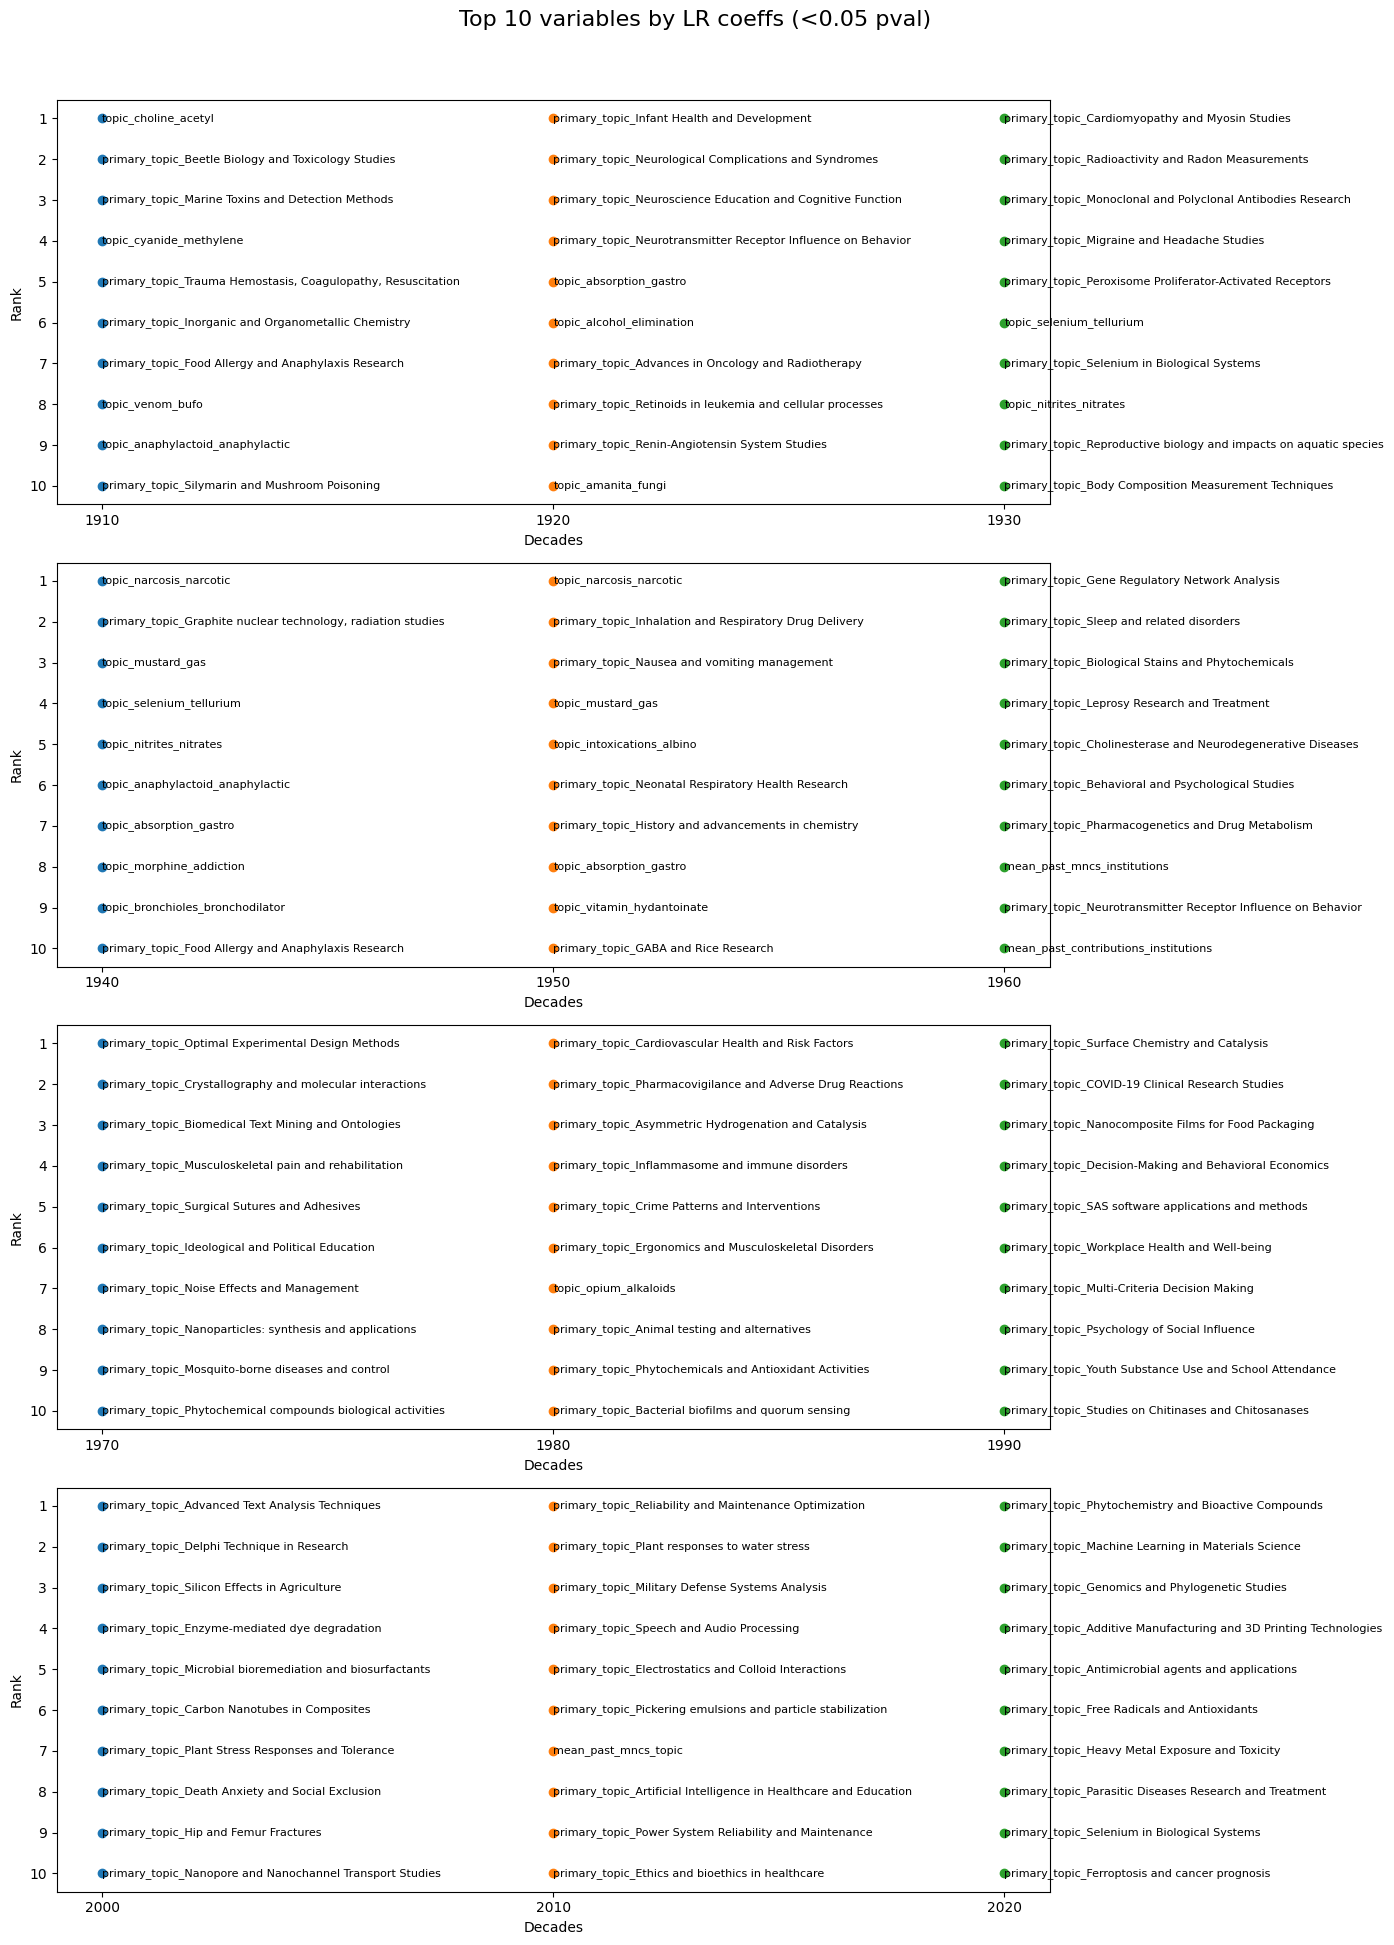

In [62]:
import matplotlib.pyplot as plt

decades = list(all_top10.keys())
n_decades = len(decades)

fig, axes = plt.subplots(4, 1, figsize=(14, 20), sharex=False)
fig.suptitle("Top 10 variables by LR coeffs (<0.05 pval)", fontsize=16, y=0.97)

chunk_size = 3
for i, ax in enumerate(axes):
    start = i * chunk_size
    end = min(start + chunk_size, n_decades)
    subset = decades[start:end]

    for j, decade in enumerate(subset):
        topics = list(all_top10[decade].keys())
        y_positions = range(10)
        x_offset = j * 0.5  
        ax.scatter([decade]*10, y_positions)
        for y, topic in zip(y_positions, topics):
               ax.text(decade, y, topic, fontsize=8, ha='left', va='center')
            
    ax.invert_yaxis()
    ax.set_xlabel("Decades")
    ax.set_yticks(range(10))
    ax.set_yticklabels([f"{i+1}" for i in range(10)])
    ax.set_ylabel("Rank")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


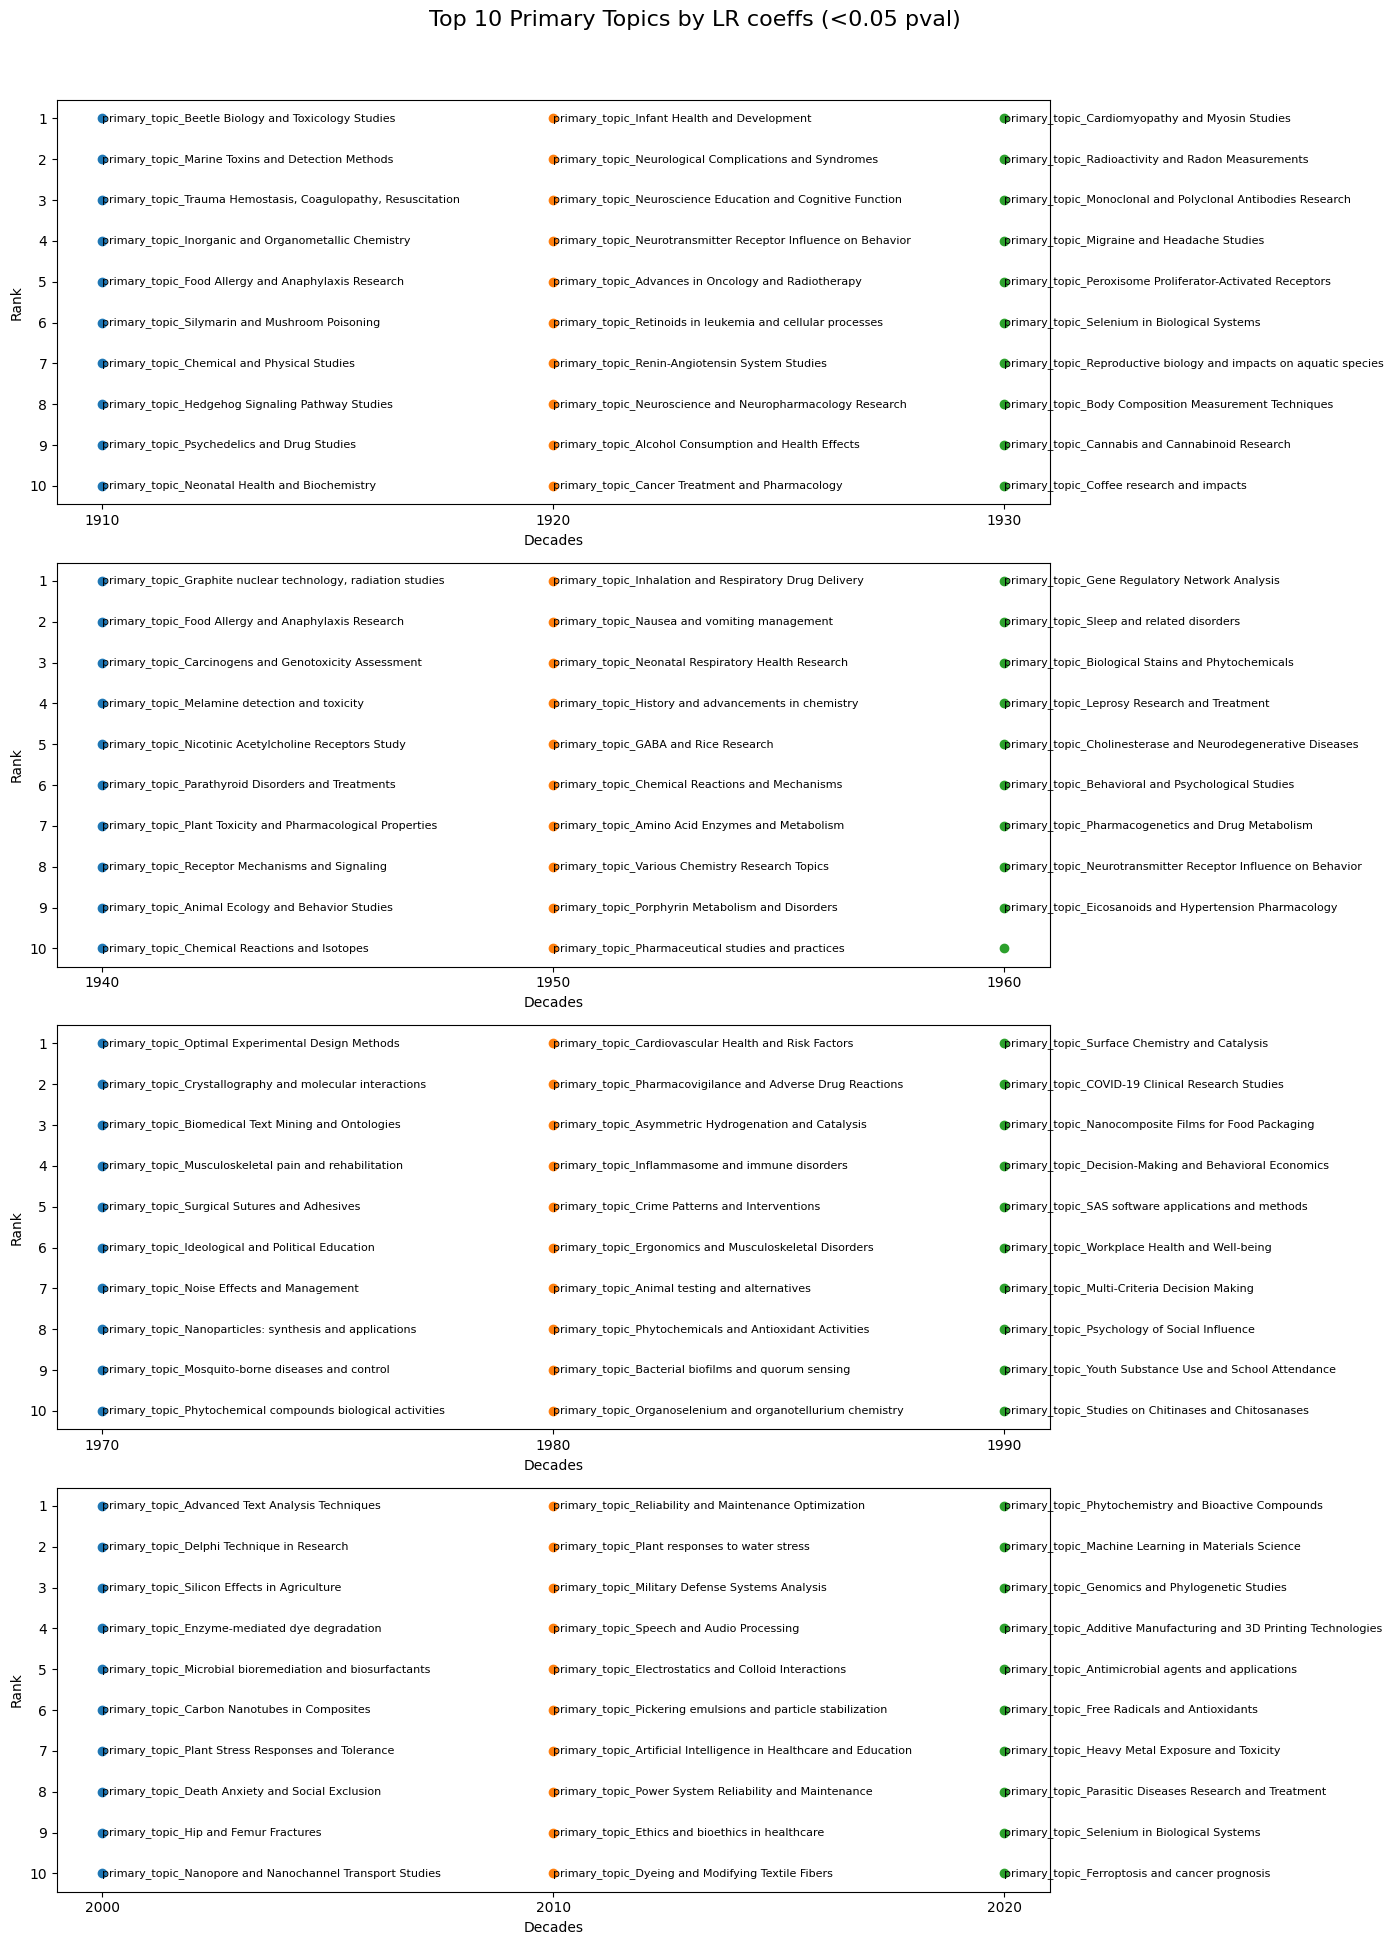

In [63]:
decades = list(primary_topic_top10.keys())
n_decades = len(decades)

fig, axes = plt.subplots(4, 1, figsize=(14, 20), sharex=False)
fig.suptitle("Top 10 Primary Topics by LR coeffs (<0.05 pval)", fontsize=16, y=0.97)

chunk_size = 3
for i, ax in enumerate(axes):
    start = i * chunk_size
    end = min(start + chunk_size, n_decades)
    subset = decades[start:end]

    for j, decade in enumerate(subset):
        topics = list(primary_topic_top10[decade].keys())
        y_positions = range(10)
        x_offset = j * 0.5  
        ax.scatter([decade]*10, y_positions)
        for y, topic in zip(y_positions, topics):
               ax.text(decade, y, topic, fontsize=8, ha='left', va='center')
            
    ax.invert_yaxis()
    ax.set_xlabel("Decades")
    ax.set_yticks(range(10))
    ax.set_yticklabels([f"{i+1}" for i in range(10)])
    ax.set_ylabel("Rank")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


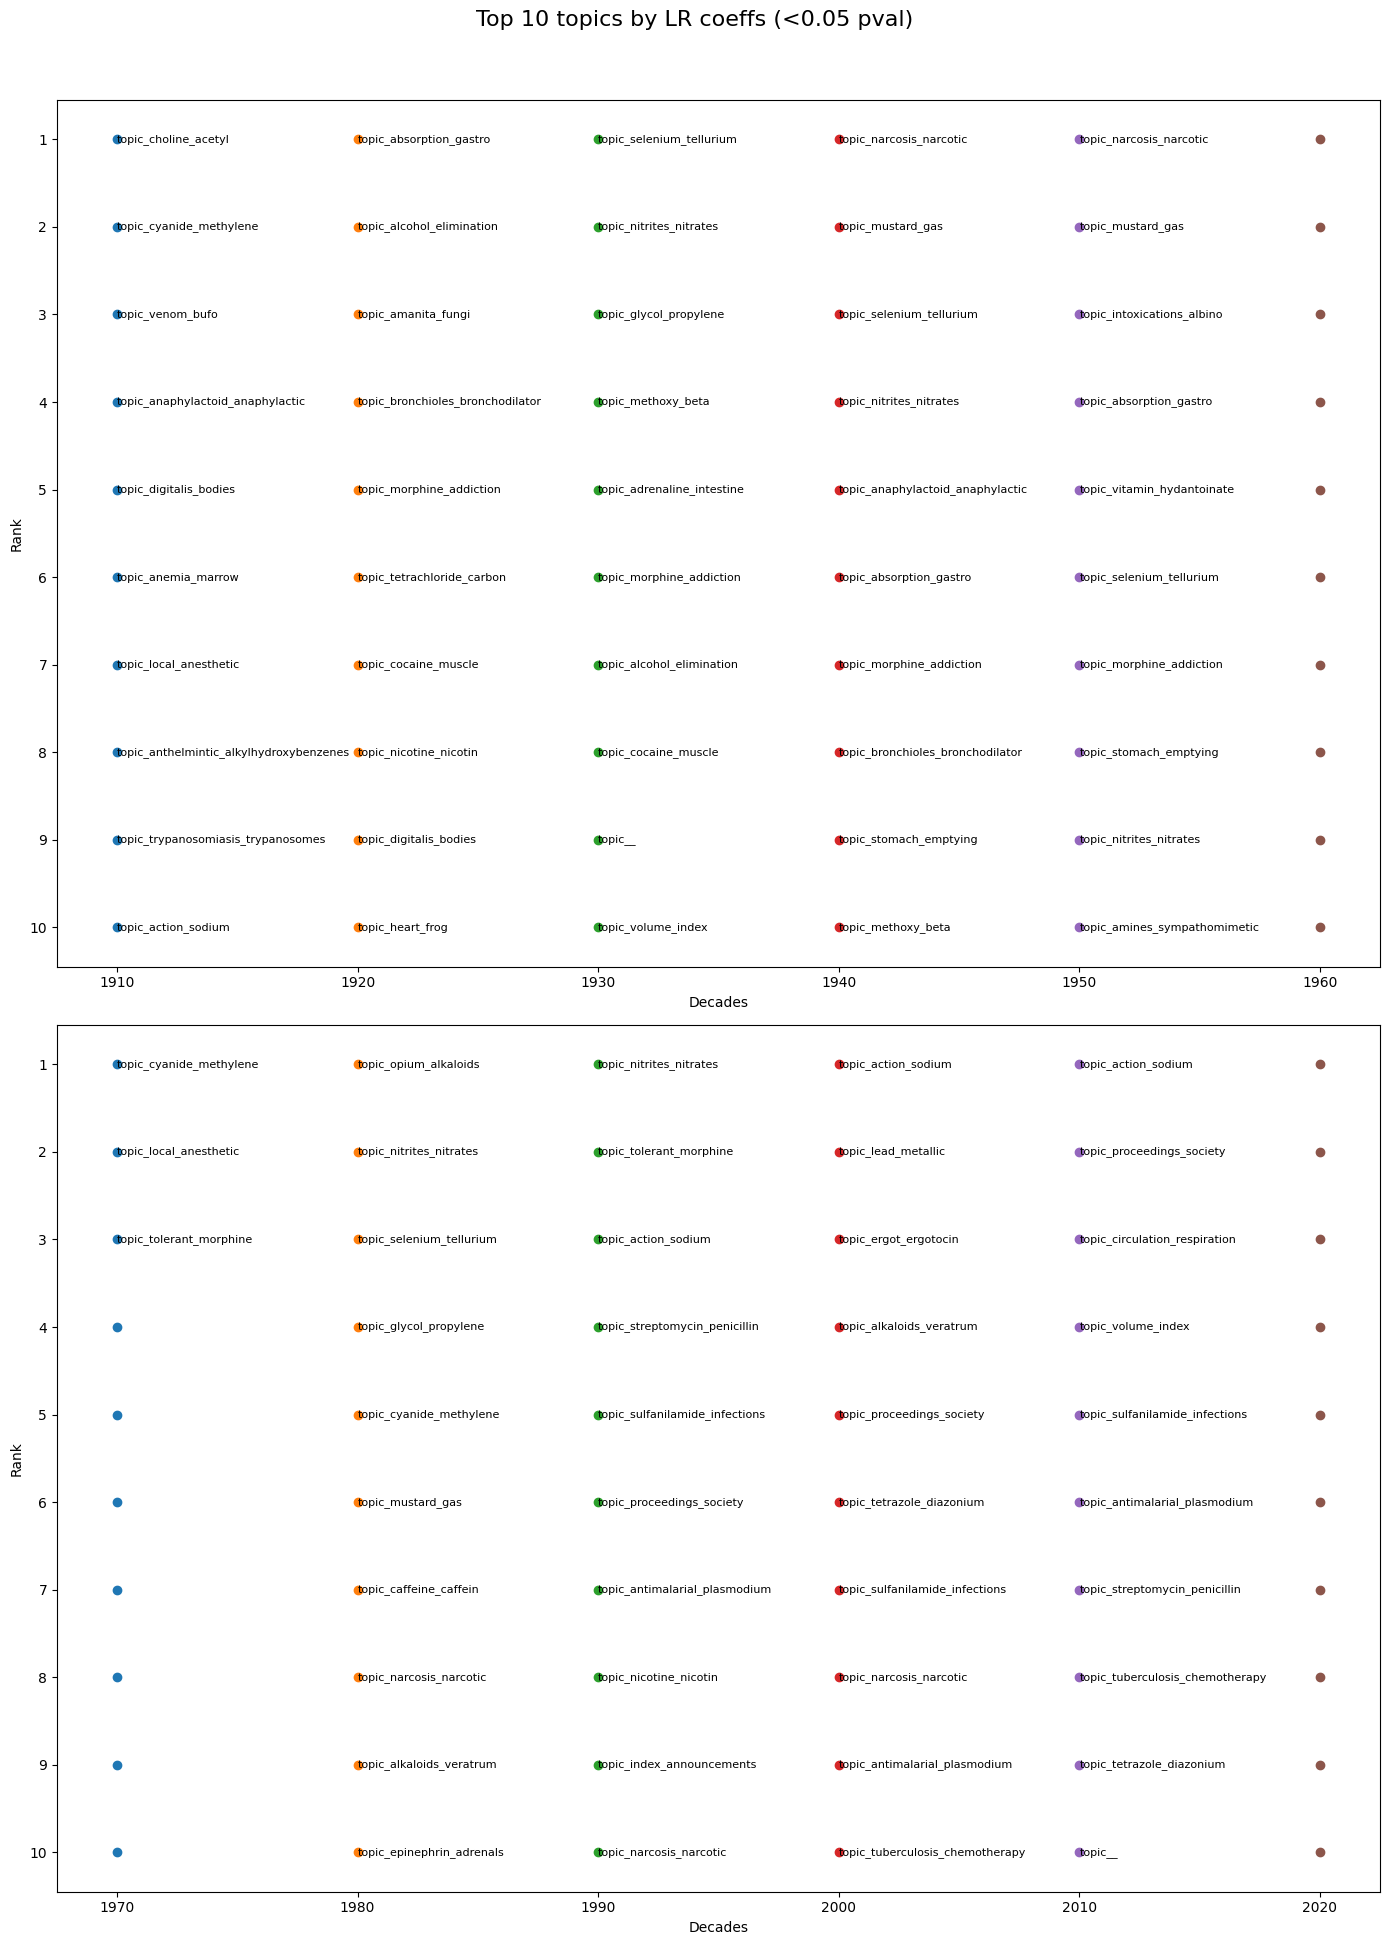

In [64]:
decades = list(topic_top10.keys())
n_decades = len(decades)

fig, axes = plt.subplots(2, 1, figsize=(14, 20), sharex=False)
fig.suptitle("Top 10 topics by LR coeffs (<0.05 pval)", fontsize=16, y=0.97)

chunk_size = 6
for i, ax in enumerate(axes):
    start = i * chunk_size
    end = min(start + chunk_size, n_decades)
    subset = decades[start:end]

    for j, decade in enumerate(subset):
        topics = list(topic_top10[decade].keys())
        y_positions = range(10)
        x_offset = j * 0.5  
        ax.scatter([decade]*10, y_positions)
        for y, topic in zip(y_positions, topics):
               ax.text(decade, y, topic, fontsize=8, ha='left', va='center')
            
    ax.invert_yaxis()
    ax.set_xlabel("Decades")
    ax.set_yticks(range(10))
    ax.set_yticklabels([f"{i+1}" for i in range(10)])
    ax.set_ylabel("Rank")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


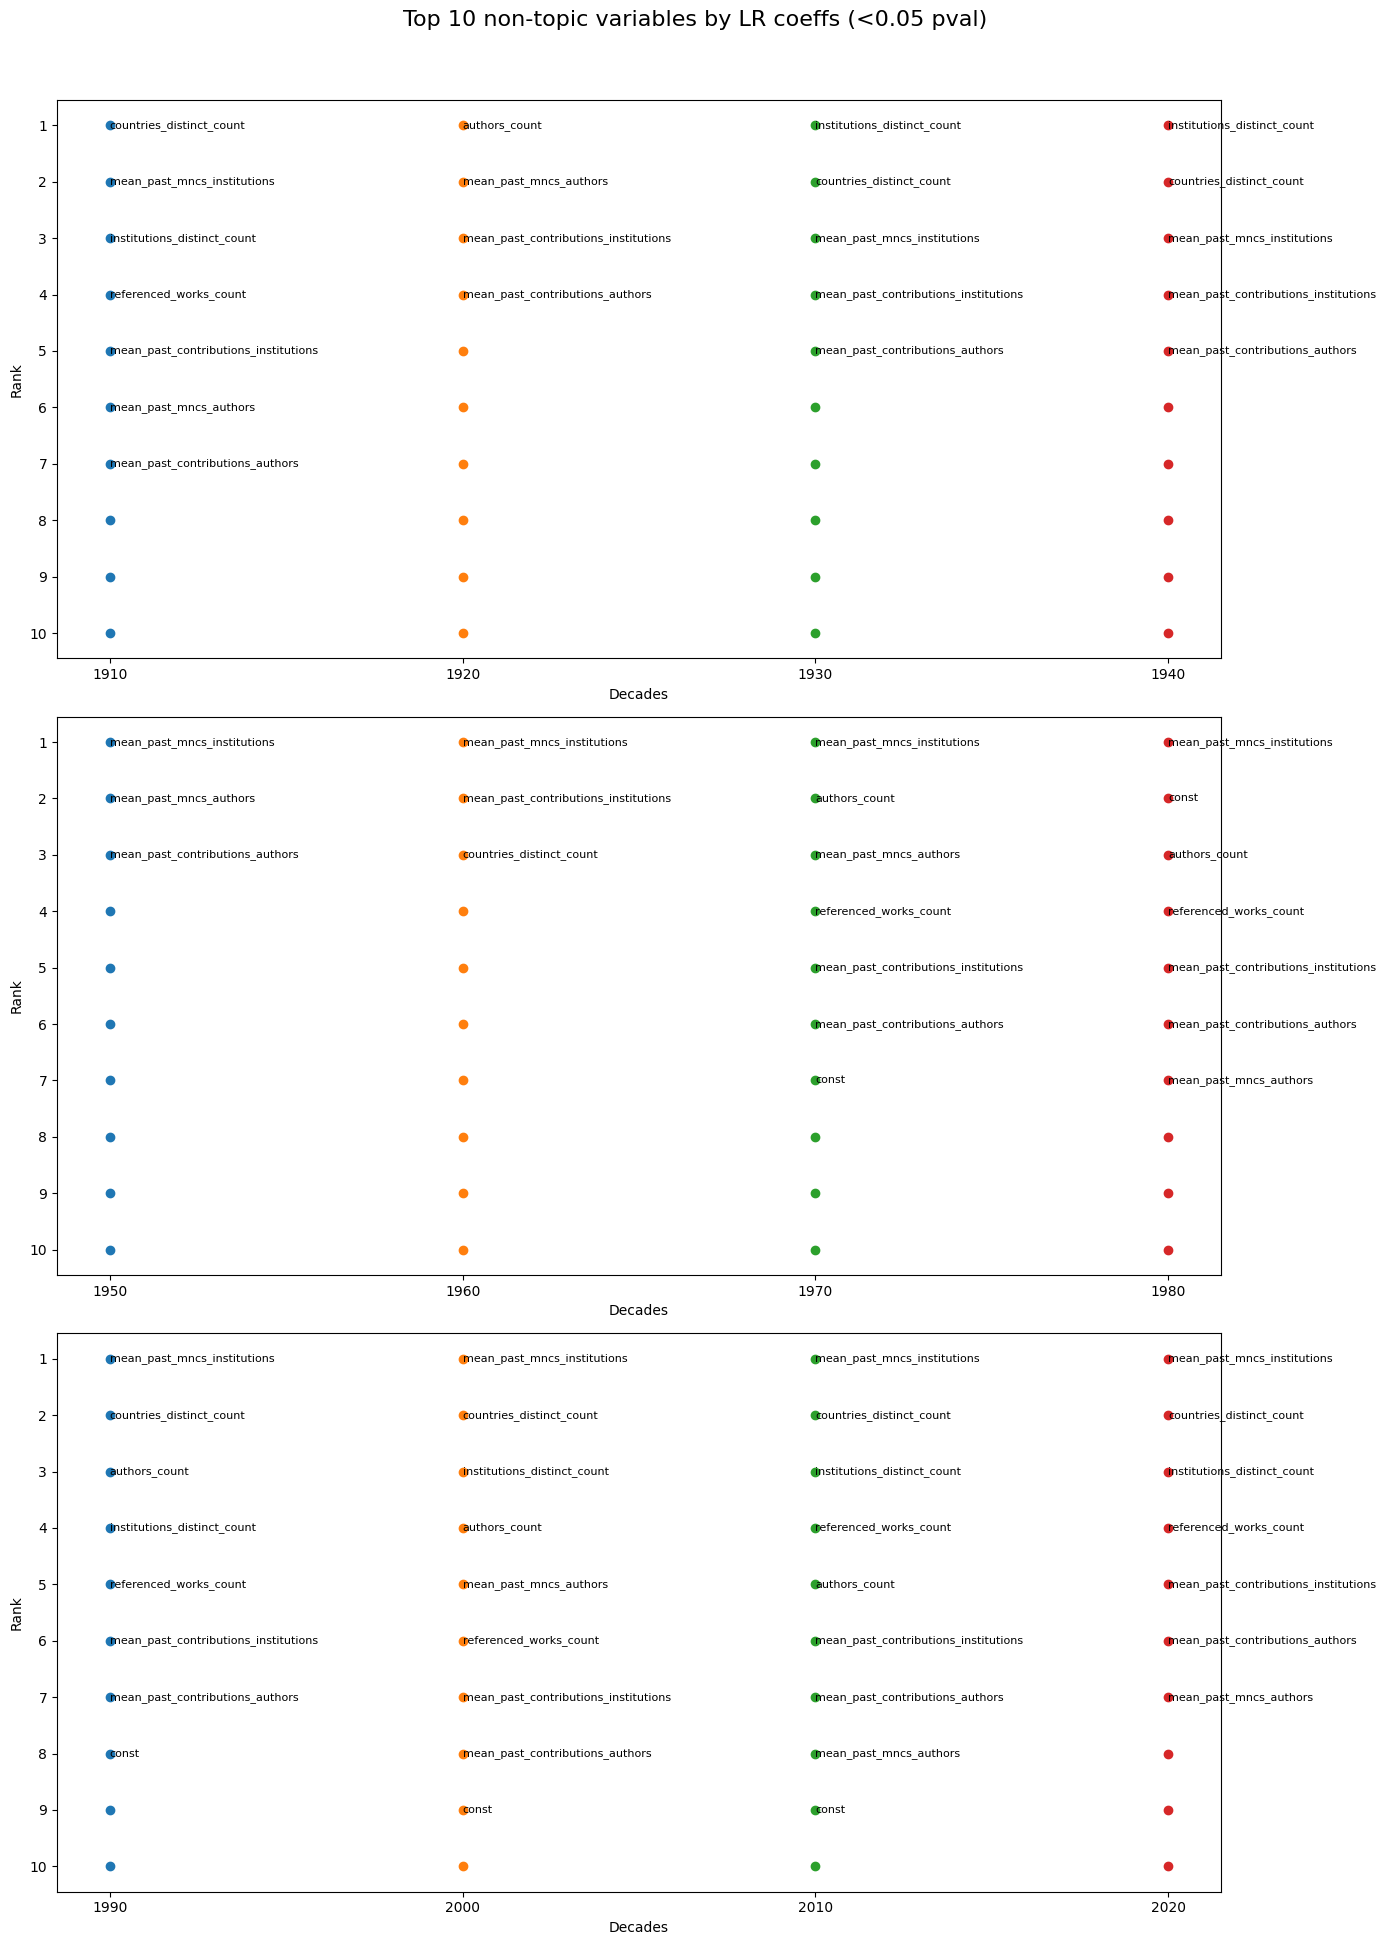

In [65]:
decades = list(other_top10.keys())
n_decades = len(decades)

fig, axes = plt.subplots(3, 1, figsize=(14, 20), sharex=False)
fig.suptitle("Top 10 non-topic variables by LR coeffs (<0.05 pval)", fontsize=16, y=0.97)

chunk_size = 4
for i, ax in enumerate(axes):
    start = i * chunk_size
    end = min(start + chunk_size, n_decades)
    subset = decades[start:end]

    for j, decade in enumerate(subset):
        topics = list(other_top10[decade].keys())
        y_positions = range(10)
        x_offset = j * 0.5  
        ax.scatter([decade]*10, y_positions)
        for y, topic in zip(y_positions, topics):
               ax.text(decade, y, topic, fontsize=8, ha='left', va='center')
            
    ax.invert_yaxis()
    ax.set_xlabel("Decades")
    ax.set_yticks(range(10))
    ax.set_yticklabels([f"{i+1}" for i in range(10)])
    ax.set_ylabel("Rank")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


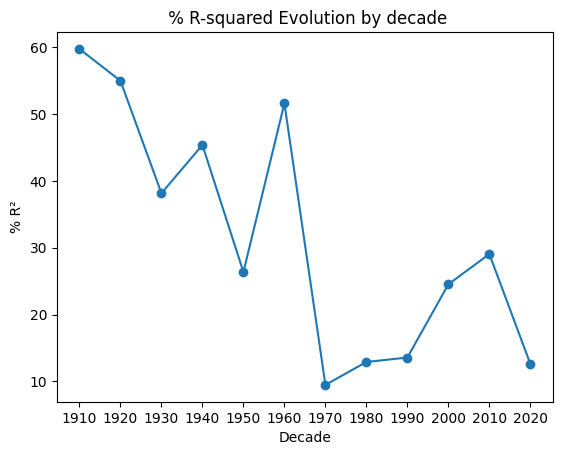

In [66]:
plt.plot(list(lcc_percentiles.keys()), list(lcc_percentiles.values()), marker='o')
plt.xlabel("Decade")
plt.ylabel("% R²")
plt.title(" % R-squared Evolution by decade")
plt.show()

summuary - Plot top 5 - mix columns - exclude meta/review